<a href="https://colab.research.google.com/github/Abhi-3026/AI_ML_AVEN/blob/main/Outlier_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

#load the dataset
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**METHOD - 1 (Z- SCORE FORMULA)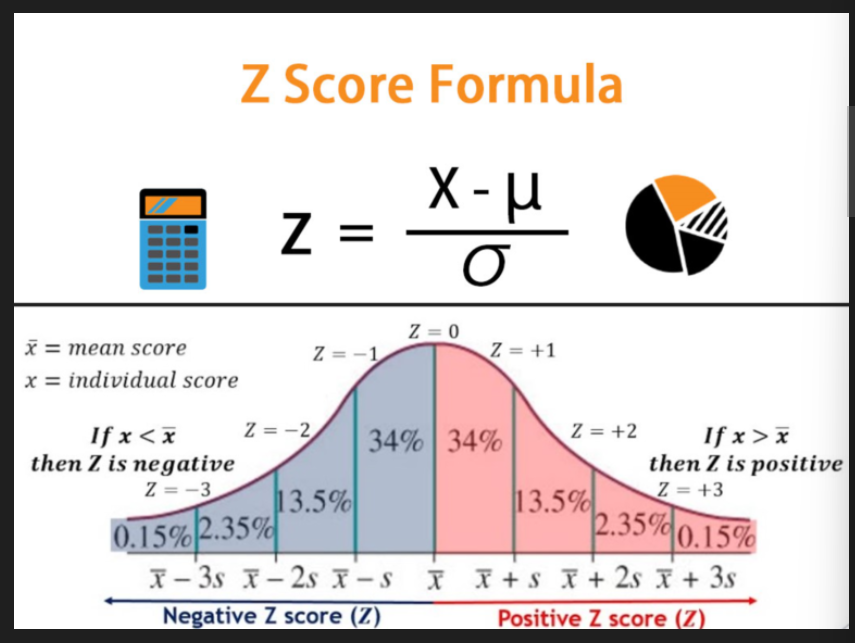

In [15]:
z_scores = stats.zscore(iris.drop('species', axis=1))  # Compute Z-scores
abs_z_scores = np.abs(z_scores)  # Take absolute values

filtered_entries = (abs_z_scores < 3).all(axis=1)  # Keep only non-outliers
new_iris = iris[filtered_entries]

new_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
#Remove outliers
iris_cleaned = iris[filtered_entries]

print(f"Original DataFrame shape: {iris.shape[0]}")
print(f"Cleaned DataFrame shape: {iris_cleaned.shape[0]}")

Original DataFrame shape: 150
Cleaned DataFrame shape: 149


METHOD -2

METHOS - 2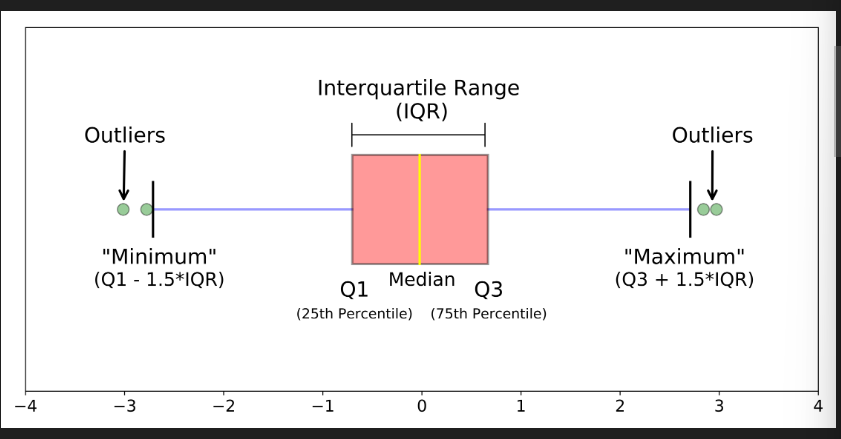

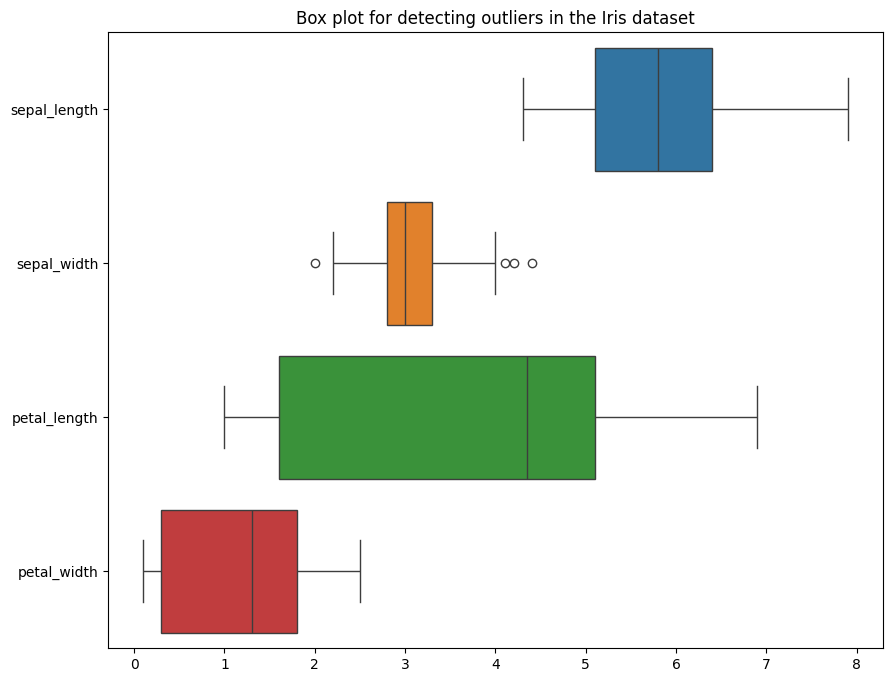

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = iris, orient = "h")
plt.title("Box plot for detecting outliers in the Iris dataset")
plt.show()

Detected outliers in sepal_width:
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


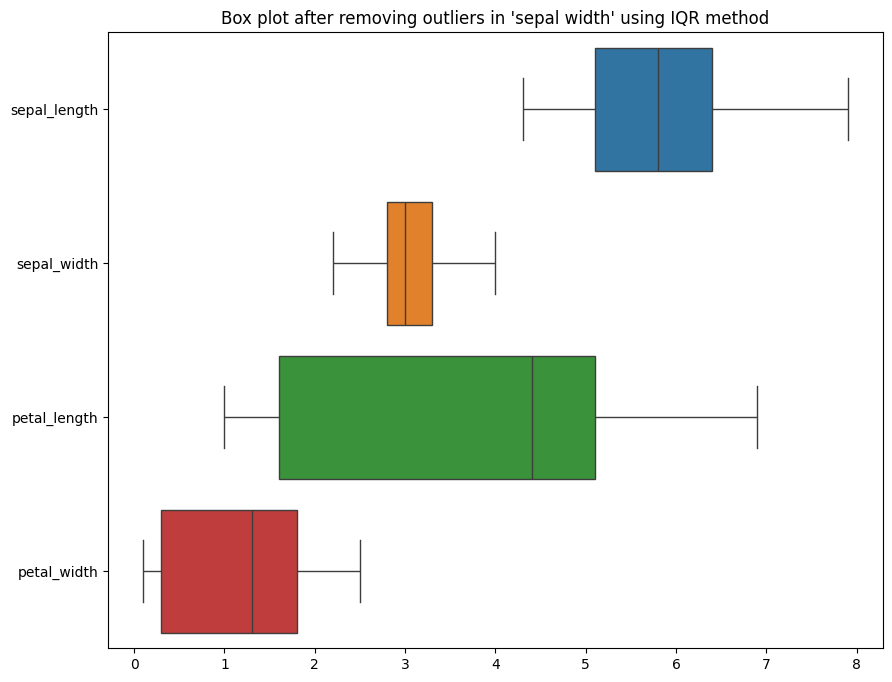

Cleaned dataset size: 146


In [19]:
# Method-2-> Function to remove outliers using IQR
def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f"Detected outliers in {feature}:")
    print(outliers)

    # Removing the outliers
    data_cleaned = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data_cleaned

# Apply the function to the 'sepal_width' feature
iris_cleaned = remove_outliers_iqr(iris, 'sepal_width')

# Visualize with box plots after removing outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_cleaned.drop('species', axis=1), orient="h")
plt.title("Box plot after removing outliers in 'sepal width' using IQR method")
plt.show()

# Print the size of the cleaned dataset
print(f"Cleaned dataset size: {iris_cleaned.shape[0]}")
